In [137]:
from pycupid import clumpfind, fellwalker, reinhold, gaussclumps
from astropy.io import fits
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube
from astropy import stats

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in" 

In [138]:
def load_data(fits_path):
    hdulist = fits.open(fits_path)
    data = hdulist[0].data
    # droping out the stokes dimension
    data = np.ascontiguousarray(data)

    # in case NaN values exist on cube
    mask = np.isnan(data)
    if np.any(mask): data = ma.masked_array(data, mask=mask)

    # map to 0-1 intensity range
    data -= data.min()
    data /= data.max()

    if data.shape[0]==1:
        data = np.ascontiguousarray(data[0])
        if np.any(mask):
            mask = np.ascontiguousarray(mask[0])
            data = ma.masked_array(data, mask=mask)
    return data

def estimate_rms(data):
    """
    Computes RMS value of an N-dimensional numpy array
    """

    if isinstance(data, ma.MaskedArray):
        ret = np.sum(data*data) / (np.size(data) - np.sum(data.mask))
    else:
        ret = np.sum(data*data) / np.size(data)
    return np.sqrt(ret)

In [154]:
data_ = load_data('./ngc1672_halpha_testregion.fits')
rms = estimate_rms(data_[data_!=0])
print(rms)
# rms = stats.mad_std(data_[data_!=0], ignore_nan=True)
# print(rms)

0.08299907159717852


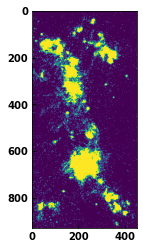

In [155]:
"""Quick check"""
plt.imshow(data_)
plt.imshow(data_>rms)

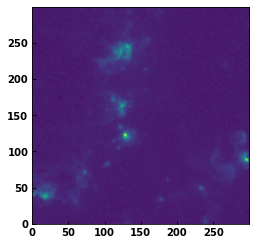

In [141]:
# # data = data[50:150, 200:300]
# data = data_[500:800,50:350]
# plt.imshow(np.sqrt(np.sqrt(data)), origin='lower')

data = data_[100:400,50:350]
plt.imshow(np.sqrt(np.sqrt(data)), origin='lower')

Examples of how to run these routines are given here: https://pycupid.readthedocs.io/en/latest/pycupid_usage.html

In [142]:
# out_gc = gaussclumps(data,0.2*rms)
# out_gc[out_gc==out_gc.min()] = 0.

# plt.figure(figsize=(10,10))
# plt.imshow(out_gc.T, origin='lower')
# # plt.axis('off')
# # plt.show()

In [145]:
out_cf = clumpfind(data, rms*1)
out_cf[out_cf==out_cf.min()] = 0.
plt.figure(figsize=(10,10))
plt.imshow(out_cf.T, origin='lower')
plt.axis('off')
plt.show()

AttributeError: 'NoneType' object has no attribute 'min'

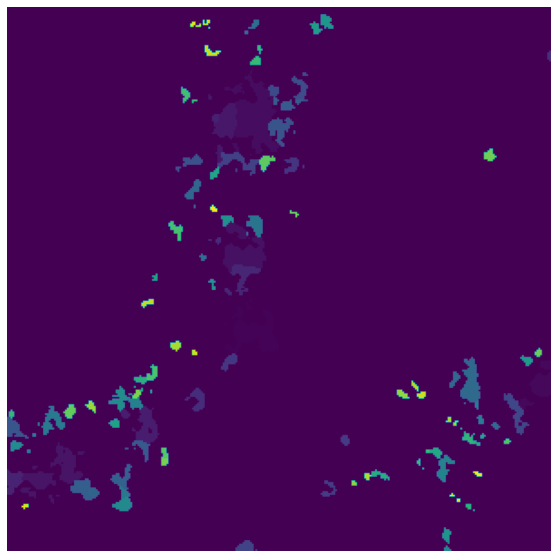

In [121]:
out_fw = fellwalker(data, rms*0.5)
out_fw[out_fw==out_fw.min()] = 0.
plt.figure(figsize=(10,10))
plt.imshow(out_fw.T, origin='lower')
plt.axis('off')
plt.show()

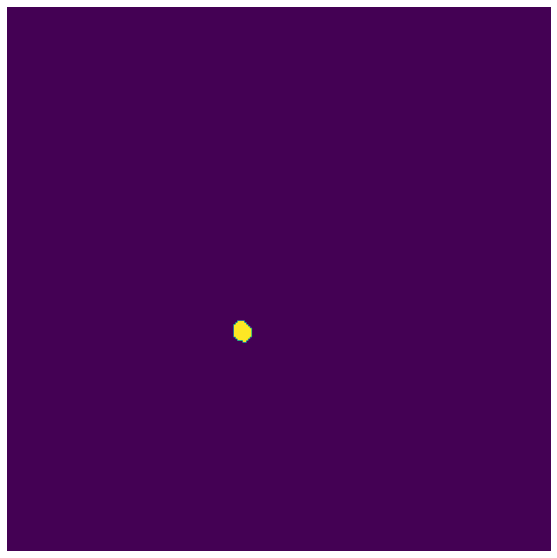

In [116]:
out_rh = reinhold(data, rms*1)
out_rh[out_rh==out_rh.min()] = 0.
plt.figure(figsize=(10,10))
plt.imshow(out_rh.T, origin='lower')
plt.axis('off')
plt.show()